# Feedforward neural net

In [12]:
# import libraries 

import numpy as np
import pandas as pd       
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# The LabelBinarizer will be used to one-hot encode our integer labels as vector labels. 
# One-hot encoding transforms categorical labels from a single integer to a vector. 

In [2]:
# importing necessary packages to create a simple feedforward neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
# The Sequential class indicates that our network will be feedforward and layers will be added to the class sequentially, one on top of the other. 
# Dense is the implementation of our fully connected layers. 
# Finally, to gain access to full MNIST dataset, we need to import mnist.

In [3]:
# loading the MNIST dataset
print("MNIST dataset")
((trainX, trainY), (testX, testY)) = mnist.load_data()
print('Shape of training data',trainX.shape)
print('Shape of test data',testX.shape)

MNIST dataset
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)


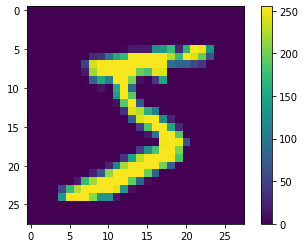

5


In [4]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.show()
print(trainY[0])

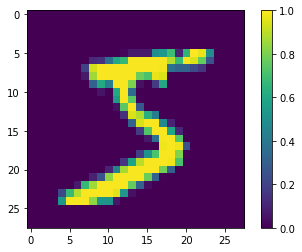

5


In [5]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# Normalizing the data generally speeds up learning and leads to faster convergence. 
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.show()
print(trainY[0])

In [6]:
# Given the training and testing splits, we can now encode our labels:

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# performs process of one-hot encoding the input integer labels as vector labels for both the training and testing set.

In [7]:
# Next, let’s define our network architecture (784-256-128-10)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# train the model using SGD

print("[Training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)


[Training network...
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 2.1478 - acc: 0.3842 - val_loss: 1.8991 - val_acc: 0.6246
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1.5005 - acc: 0.6715 - val_loss: 1.1093 - val_acc: 0.7732
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.9090 - acc: 0.7883 - val_loss: 0.7395 - val_acc: 0.8235
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.6622 - acc: 0.8344 - val_loss: 0.5753 - val_acc: 0.8549
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.5441 - acc: 0.8577 - val_loss: 0.4926 - val_acc: 0.8713
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4771 - acc: 0.8723 - val_loss: 0.4385 - val_acc: 0.8834
Epoch 7/10
60000/60000 [=======================

In [9]:
# evaluate the network on the testing data to obtain our final classifications

print("Evaluating network...")

test_loss, test_acc = model.evaluate(testX,  testY)


Evaluating network...
10000/10000 [==============================] - 0s 23us/sample - loss: 0.3466 - acc: 0.9019


In [10]:
predictions = model.predict(testX) # returns the class label probabilities for every data point in testX
print(predictions[0])
print(np.argmax(predictions[0]))

[2.9722875e-04 6.7884284e-06 1.1329845e-04 1.5443551e-03 1.1951549e-05
 1.2394664e-04 1.2751048e-07 9.9199122e-01 2.3715760e-05 5.8872993e-03]
7


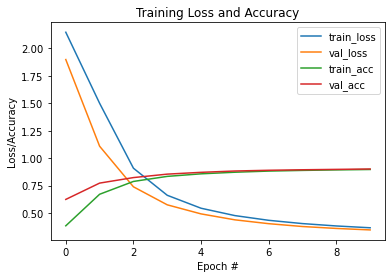

In [11]:
# plot the training loss and accuracy

plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()